In [1]:
#import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime

In [2]:
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]

In [3]:
#load in neccesary CSV files
diagnosis_icd9 = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/DIAGNOSES_ICD.csv", usecols= ["SUBJECT_ID", "ICD9_CODE"])
diag_name = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/D_ICD_DIAGNOSES.csv", usecols= ["ICD9_CODE", "LONG_TITLE"])
code_description = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/DRGCODES.csv")
patients = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/PATIENTS.csv", parse_dates= ["DOB"], date_parser=dateparse, usecols=["SUBJECT_ID", "DOB"])
admissions = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/ADMISSIONS.csv", parse_dates= ["ADMITTIME"], date_parser=dateparse, usecols=["SUBJECT_ID", "ADMITTIME"])
diagnosis_icd9.head()

/global/homes/d/dsmorrow/.conda/envs/intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,SUBJECT_ID,ICD9_CODE
0,109,40301
1,109,486
2,109,58281
3,109,5855
4,109,4254


In [4]:
#filter for only "diseases of despair" ICD9 codes
diag_dd_DF = diagnosis_icd9[diagnosis_icd9["ICD9_CODE"].str.startswith(("327", "338", "339", "346", "295", "296", "297", "298", "300", "301", "302", "307", "309", "310", "311", "313"), na = False)]
diag_dd_DF.head()

,SUBJECT_ID,ICD9_CODE
22,109,32723
24,109,33829
248,135,311
305,67,311
311,67,311


In [5]:
#bring in the dob column from separate csv
diag_dd_DF = pd.merge(diag_dd_DF, patients, on='SUBJECT_ID')
diag_dd_DF.head()

,SUBJECT_ID,ICD9_CODE,DOB
0,109,32723,2117-08-07
1,109,33829,2117-08-07
2,109,32723,2117-08-07
3,109,33829,2117-08-07
4,109,32723,2117-08-07


In [6]:
#bring in the admittime column from separate csv
diag_dd_DF = pd.merge(diag_dd_DF, admissions, on="SUBJECT_ID")
diag_dd_DF.head()

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME
0,109,32723,2117-08-07,2137-11-04 19:36:00
1,109,32723,2117-08-07,2138-04-16 17:44:00
2,109,32723,2117-08-07,2140-01-19 13:25:00
3,109,32723,2117-08-07,2140-02-02 02:13:00
4,109,32723,2117-08-07,2140-04-07 19:51:00


In [7]:
diag_dd_DF['DOB'].isnull().values.any()

False

In [8]:
diag_dd_DF['ADMITTIME'].isnull().values.any()

False

In [9]:
#change dob and admittime from object to datetime
diag_dd_DF["DOB"] = pd.to_datetime(diag_dd_DF["DOB"]) 
diag_dd_DF["ADMITTIME"] = pd.to_datetime(diag_dd_DF["ADMITTIME"]) 

In [10]:
diag_dd_DF.dtypes

SUBJECT_ID             int64
ICD9_CODE             object
DOB           datetime64[ns]
ADMITTIME     datetime64[ns]
dtype: object

In [11]:
#find the age of the patient using .subtract
diag_dd_DF["AGE"] = diag_dd_DF["ADMITTIME"].subtract(diag_dd_DF["DOB"]).dt.days/365
diag_dd_DF["AGE"] = diag_dd_DF["AGE"].round()

In [12]:
import sys
sys.maxsize

9223372036854775807

In [13]:
diag_dd_DF.count()

SUBJECT_ID    36382
ICD9_CODE     36382
DOB           36382
ADMITTIME     36382
AGE           36382
dtype: int64

In [14]:
#how many icd9 codes are there for the DD?
diag_dd_DF.groupby(['ICD9_CODE']).count()

,SUBJECT_ID,DOB,ADMITTIME,AGE
ICD9_CODE,,,,
29502,1,1,1,1
29512,5,5,5,5
29520,8,8,8,8
29522,1,1,1,1
29524,2,2,2,2
...,...,...,...,...
34670,2,2,2,2
34680,38,38,38,38
34690,1362,1362,1362,1362


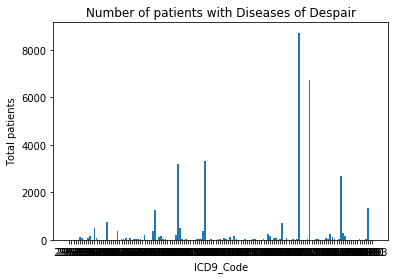

In [78]:
#as you can see, looking at 150 different ICD9 codes can be confusing
DF = diag_dd_DF[['SUBJECT_ID', 'ICD9_CODE']]
DF = DF.groupby(['ICD9_CODE'], as_index=False).count()
plt.title("Number of patients with Diseases of Despair")
plt.xlabel("ICD9_Code")
plt.ylabel("Total patients")
plt.bar(DF['ICD9_CODE'], DF['SUBJECT_ID'])
plt.rcParams['figure.figsize'] = [16, 10]
plt.show()

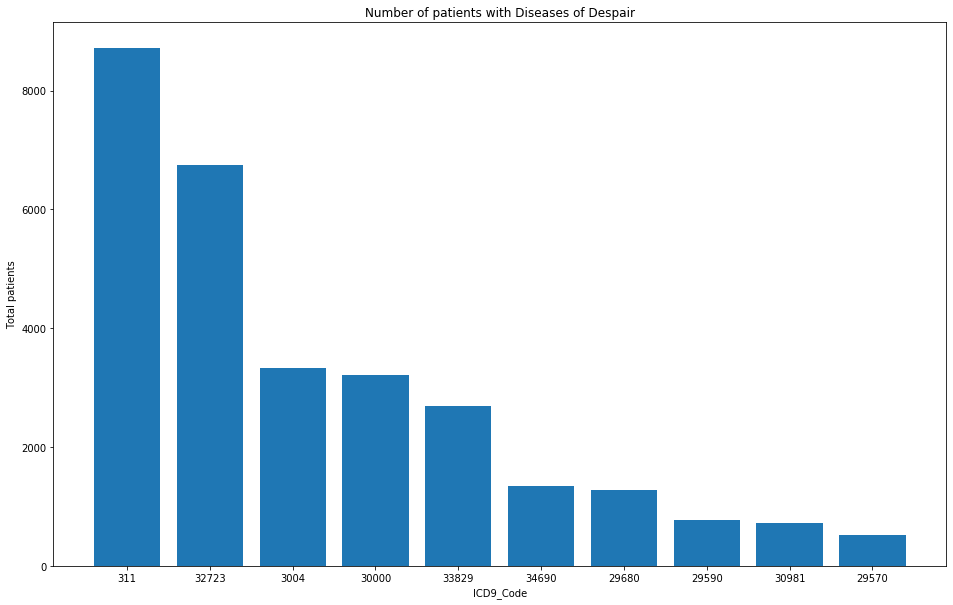

In [106]:
#lets look at the top 10 codes
TopDF = DF.sort_values(by=['SUBJECT_ID'], ascending=False)
TopDF = TopDF.head(10)
plt.title("Number of patients with Diseases of Despair")
plt.xlabel("ICD9_Code")
plt.ylabel("Total patients")
plt.bar(TopDF['ICD9_CODE'], TopDF['SUBJECT_ID'])
plt.rcParams['figure.figsize'] = [16, 10]
plt.show()

In [15]:
#merge in separate dataframe to include the name/description of the ICD9 code 
diagDFdesc = pd.merge(diag_dd_DF, diag_name, on='ICD9_CODE')
diagDFdesc

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,LONG_TITLE
0,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Obstructive sleep apnea (adult)(pediatric)
1,109,32723,2117-08-07,2138-04-16 17:44:00,21.0,Obstructive sleep apnea (adult)(pediatric)
2,109,32723,2117-08-07,2140-01-19 13:25:00,22.0,Obstructive sleep apnea (adult)(pediatric)
3,109,32723,2117-08-07,2140-02-02 02:13:00,23.0,Obstructive sleep apnea (adult)(pediatric)
4,109,32723,2117-08-07,2140-04-07 19:51:00,23.0,Obstructive sleep apnea (adult)(pediatric)
...,...,...,...,...,...,...
36375,99085,34691,2091-02-01,2131-02-08 16:25:00,40.0,"Migraine, unspecified, with intractable migrai..."
36376,95841,33902,2111-12-01,2160-04-09 21:23:00,48.0,Chronic cluster headache
36377,96928,29621,2073-05-24,2138-06-03 12:36:00,65.0,"Major depressive affective disorder, single ep..."
36378,96928,29621,2073-05-24,2139-01-01 15:02:00,66.0,"Major depressive affective disorder, single ep..."


In [96]:
#Title of top 10 Icd9 diseases of despair
DF2 = diagDFdesc[['SUBJECT_ID', 'LONG_TITLE']]
DF2 = DF2.groupby(['LONG_TITLE'], as_index=False).count()
TopDF2 = DF2.sort_values(by=['SUBJECT_ID'], ascending=False)
TopDF2 = TopDF2.head(10)
TopDF2

,LONG_TITLE,SUBJECT_ID
43,"Depressive disorder, not elsewhere classified",9010
81,Obstructive sleep apnea (adult)(pediatric),6858
50,Dysthymic disorder,3418
11,"Anxiety state, unspecified",3326
89,Other chronic pain,2723
76,"Migraine, unspecified, without mention of intr...",1362
22,"Bipolar disorder, unspecified",1283
147,"Unspecified schizophrenia, unspecified",777
114,Posttraumatic stress disorder,739
125,"Schizoaffective disorder, unspecified",517


In [16]:
#looking to see what the range of ages is
diag_dd_DF.sort_values(by=['AGE'],ascending=True)

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE
5257,7235,311,1850-01-20,2150-02-04 02:12:00,-285.0
29722,69262,3004,1811-07-24,2111-07-24 21:58:00,-285.0
29720,70682,311,1869-02-10,2169-02-10 12:03:00,-285.0
34465,91525,311,1860-05-28,2160-05-28 22:39:00,-285.0
29665,69702,34690,1890-02-10,2190-02-10 17:40:00,-285.0
...,...,...,...,...,...
1111,63,3079,2080-07-07,2169-01-07 01:50:00,89.0
12860,19155,311,2084-08-07,2173-08-02 17:12:00,89.0
25202,48253,311,2080-10-20,2169-09-08 22:44:00,89.0
29384,71915,311,2012-07-16,2101-03-08 04:57:00,89.0


In [17]:
diag_dd_DF = diag_dd_DF[diag_dd_DF.AGE >= 18]
diag_dd_DF.sort_values(by=['AGE'],ascending=True)

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE
21753,31602,30981,2107-01-20,2125-04-11 23:59:00,18.0
23980,47591,3101,2150-08-04,2169-01-26 07:06:00,18.0
23981,47591,3380,2150-08-04,2169-01-26 07:06:00,18.0
23164,31037,29680,2171-11-23,2190-05-06 20:51:00,18.0
29561,69168,30000,2146-07-15,2164-11-11 10:50:00,18.0
...,...,...,...,...,...
4024,6283,311,2103-01-19,2191-07-07 05:49:00,89.0
35922,99559,311,2064-06-22,2153-06-11 21:08:00,89.0
4026,6283,30000,2103-01-19,2191-07-07 05:49:00,89.0
32929,78337,29570,2024-09-14,2113-07-14 03:23:00,89.0


In [18]:
notes = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/NOTEEVENTS.csv", usecols = ['SUBJECT_ID','CATEGORY', 'TEXT'])
notes.head()

,SUBJECT_ID,CATEGORY,TEXT
0,22532,Discharge summary,Admission Date: [**2151-7-16**] Dischar...
1,13702,Discharge summary,Admission Date: [**2118-6-2**] Discharg...
2,13702,Discharge summary,Admission Date: [**2119-5-4**] D...
3,13702,Discharge summary,Admission Date: [**2124-7-21**] ...
4,26880,Discharge summary,Admission Date: [**2162-3-3**] D...


In [19]:
#merge dd dataframe with notes
icd9_dd_notes = pd.merge(diag_dd_DF, notes, on ='SUBJECT_ID')
icd9_dd_notes.head()

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,CATEGORY,TEXT
0,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-15**] ...
1,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-20**] ...
2,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-6-18**] ...
3,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-3**] D...
4,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-7**] D...


In [20]:
#how many entries?
icd9_dd_notes.count()

SUBJECT_ID    8513842
ICD9_CODE     8513842
DOB           8513842
ADMITTIME     8513842
AGE           8513842
CATEGORY      8513842
TEXT          8513842
dtype: int64

In [21]:
#drop any duplicate TEXT entries 
icd9_notes_unique = icd9_dd_notes.drop_duplicates(subset='TEXT', keep='first')
icd9_notes_unique

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,CATEGORY,TEXT
0,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-15**] ...
1,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-20**] ...
2,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-6-18**] ...
3,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-3**] D...
4,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-7**] D...
...,...,...,...,...,...,...,...
8513819,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Nursing,TITLE:\n Pt is 31 y/o woman with history of ...
8513820,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Physician,SICU\n HPI:\n 31 yo RH woman with a PMH de...
8513821,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Radiology,[**2158-8-1**] 10:43 AM\n MR HEAD W/O CONTRAST...
8513822,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Radiology,[**2158-7-31**] 8:52 PM\n CTA HEAD W&W/O C & R...


In [22]:
#after removing duplicates, how many entries do we have?
icd9_notes_unique.count()

SUBJECT_ID    432689
ICD9_CODE     432689
DOB           432689
ADMITTIME     432689
AGE           432689
CATEGORY      432689
TEXT          432689
dtype: int64

In [23]:
icd9_dd_notes = icd9_notes_unique

In [24]:
#how many notes per category
icd9_dd_notes.groupby(["CATEGORY"]).count().sort_values(by=['TEXT'],ascending=False)

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,TEXT
CATEGORY,,,,,,
Radiology,135365,135365,135365,135365,135365,135365
Nursing,73885,73885,73885,73885,73885,73885
Nursing/other,68651,68651,68651,68651,68651,68651
ECG,55682,55682,55682,55682,55682,55682
Physician,52143,52143,52143,52143,52143,52143
Discharge summary,14191,14191,14191,14191,14191,14191
Respiratory,11578,11578,11578,11578,11578,11578
Echo,11402,11402,11402,11402,11402,11402
Nutrition,3347,3347,3347,3347,3347,3347


In [25]:
#what is the largest number of entries for a patient?
#what is the least 
icd9_dd_notes.groupby(["SUBJECT_ID"]).count().sort_values(by=['TEXT'],ascending=False)

,ICD9_CODE,DOB,ADMITTIME,AGE,CATEGORY,TEXT
SUBJECT_ID,,,,,,
78076,1317,1317,1317,1317,1317,1317
99383,1228,1228,1228,1228,1228,1228
109,1217,1217,1217,1217,1217,1217
27427,1209,1209,1209,1209,1209,1209
67906,1017,1017,1017,1017,1017,1017
...,...,...,...,...,...,...
67019,1,1,1,1,1,1
44611,1,1,1,1,1,1
90801,1,1,1,1,1,1


In [26]:
#average number of notes per patient
#dont know how skewed this is (need to look at outliers)
icd9_dd_notes.groupby('SUBJECT_ID').count().mean()

ICD9_CODE    52.70268
DOB          52.70268
ADMITTIME    52.70268
AGE          52.70268
CATEGORY     52.70268
TEXT         52.70268
dtype: float64

In [27]:
#how many characters?
icd9_dd_notes["TEXT"].str.len()

0          10479
1          16179
2          11058
3          10613
4           9850
           ...  
8513819     1627
8513820     4672
8513821     1493
8513822     2975
8513823     1446
Name: TEXT, Length: 432689, dtype: int64

In [28]:
#summary of the notes
#what is the std?
icd9_dd_notes["TEXT"].str.len().describe()

count    432689.000000
mean       2437.127369
std        3048.404448
min           3.000000
25%         765.000000
50%        1362.000000
75%        2722.000000
max       50663.000000
Name: TEXT, dtype: float64

In [29]:
# Load the regular expression library
import re

In [30]:
# Remove punctuation and anything that isnt a character or number 
#this process took approximately (start 1:31:16 - finish 1:33:10) 2 minutes
icd9_dd_notes['text_processed'] = icd9_dd_notes['TEXT'].map(lambda x: re.sub('[\W]+', ' ', x))

In [31]:
# Convert to lowercase
icd9_dd_notes['text_processed'] = icd9_dd_notes['text_processed'].map(lambda x: x.lower())

In [32]:
# Print out the first rows of papers to ensure re working properly
icd9_dd_notes['text_processed'].head()

0    admission date 2142 5 15 discharge date 2142 5...
1    admission date 2142 5 20 discharge date 2142 6...
2    admission date 2142 6 18 discharge date 2142 6...
3    admission date 2142 7 3 discharge date 2142 7 ...
4    admission date 2142 7 7 discharge date 2142 7 ...
Name: text_processed, dtype: object

In [33]:
icd9_dd_notes.head()

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,CATEGORY,TEXT,text_processed
0,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-15**] ...,admission date 2142 5 15 discharge date 2142 5...
1,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-20**] ...,admission date 2142 5 20 discharge date 2142 6...
2,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-6-18**] ...,admission date 2142 6 18 discharge date 2142 6...
3,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-3**] D...,admission date 2142 7 3 discharge date 2142 7 ...
4,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-7**] D...,admission date 2142 7 7 discharge date 2142 7 ...


In [34]:
icd9_dd_notes.describe()

,SUBJECT_ID,AGE
count,432689.000000,432689.000000
mean,43141.585245,58.854665
std,29751.978790,15.456484
min,17.000000,18.000000
25%,18254.000000,49.000000
50%,31957.000000,60.000000
75%,70003.000000,70.000000
max,99992.000000,89.000000


In [35]:
#adding additional index column for calling
index = tuple(range(0, 432689, 1))
icd9_dd_notes["index"] = index
icd9_dd_notes

,SUBJECT_ID,ICD9_CODE,DOB,ADMITTIME,AGE,CATEGORY,TEXT,text_processed,index
0,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-15**] ...,admission date 2142 5 15 discharge date 2142 5...,0
1,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-5-20**] ...,admission date 2142 5 20 discharge date 2142 6...,1
2,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-6-18**] ...,admission date 2142 6 18 discharge date 2142 6...,2
3,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-3**] D...,admission date 2142 7 3 discharge date 2142 7 ...,3
4,109,32723,2117-08-07,2137-11-04 19:36:00,20.0,Discharge summary,Admission Date: [**2142-7-7**] D...,admission date 2142 7 7 discharge date 2142 7 ...,4
...,...,...,...,...,...,...,...,...,...
8513819,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Nursing,TITLE:\n Pt is 31 y/o woman with history of ...,title pt is 31 y o woman with history of heada...,432684
8513820,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Physician,SICU\n HPI:\n 31 yo RH woman with a PMH de...,sicu hpi 31 yo rh woman with a pmh depression ...,432685
8513821,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Radiology,[**2158-8-1**] 10:43 AM\n MR HEAD W/O CONTRAST...,2158 8 1 10 43 am mr head w o contrast clip c...,432686
8513822,97492,34680,2126-09-04,2158-07-31 22:29:00,32.0,Radiology,[**2158-7-31**] 8:52 PM\n CTA HEAD W&W/O C & R...,2158 7 31 8 52 pm cta head w w o c recons cta...,432687


In [37]:
#icd9_dd_notes.to_csv('Full_Table_ICD9_Notes.csv')

In [38]:
data_text = icd9_dd_notes[['text_processed','index']]
data_text

,text_processed,index
0,admission date 2142 5 15 discharge date 2142 5...,0
1,admission date 2142 5 20 discharge date 2142 6...,1
2,admission date 2142 6 18 discharge date 2142 6...,2
3,admission date 2142 7 3 discharge date 2142 7 ...,3
4,admission date 2142 7 7 discharge date 2142 7 ...,4
...,...,...
8513819,title pt is 31 y o woman with history of heada...,432684
8513820,sicu hpi 31 yo rh woman with a pmh depression ...,432685
8513821,2158 8 1 10 43 am mr head w o contrast clip c...,432686
8513822,2158 7 31 8 52 pm cta head w w o c recons cta...,432687


In [39]:
documents = data_text

In [40]:
#import necessary packages for further word processing
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /global/homes/d/dsmorrow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
#function to perform lemmatize and stem preprocessing steps on the data set.
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [42]:
#test the stemmer and lem on one example text
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['', 'last', 'name', 'lf', 'first', 'name3', 'lf', '1567', 'm', 'nsurg', 'fa11', '2127', '5', '8', '11', '00', 'am', 'unilat', 'lower', 'ext', 'veins', 'left', 'clip', 'clip', 'number', 'radiology', '20658', 'reason', 'lleg', 'tenderness', 'assess', 'for', 'dvt', 'admitting', 'diagnosis', 'post', 'op', 'infection', '______________________________________________________________________________', 'hospital', '3', 'medical', 'condition', '59', 'year', 'old', 'woman', 'with', 'lle', 'tenderness', 'reason', 'for', 'this', 'examination', 'please', 'r', 'o', 'dvt', '______________________________________________________________________________', 'pfi', 'report', 'no', 'left', 'lower', 'extremity', 'dvt', '']


 tokenized and lemmatized document: 
['nsurg', 'unilat', 'lower', 'vein', 'leav', 'clip', 'clip', 'number', 'radiolog', 'reason', 'lleg', 'tender', 'assess', 'admit', 'diagnosi', 'post', 'infect', 'hospit', 'medic', 'condit', 'year', 'woman', 'tender', 'reason', 'ex

In [43]:
#remove any na that would cause problems in the lda model
documents = documents.dropna(subset=['text_processed'])

In [44]:
#only looking at first 1000 documents for quicker processing
doc_group1 = documents.iloc[0:1000]
doc_group1.head()

,text_processed,index
0,admission date 2142 5 15 discharge date 2142 5...,0
1,admission date 2142 5 20 discharge date 2142 6...,1
2,admission date 2142 6 18 discharge date 2142 6...,2
3,admission date 2142 7 3 discharge date 2142 7 ...,3
4,admission date 2142 7 7 discharge date 2142 7 ...,4


In [45]:
#doc_group1.to_csv('Text_Processed.csv')

In [46]:
#use preprocess function on group1
processed_docs = doc_group1['text_processed'].map(preprocess)
processed_docs

0       [admiss, date, discharg, date, date, birth, se...
1       [admiss, date, discharg, date, date, birth, se...
2       [admiss, date, discharg, date, date, birth, se...
3       [admiss, date, discharg, date, date, birth, se...
4       [admiss, date, discharg, date, date, birth, se...
                              ...                        
1055    [micu, bilat, vein, clip, clip, number, radiol...
1056    [conrast, right, clip, clip, number, radiolog,...
1057    [conrast, right, clip, clip, number, radiolog,...
1058    [chest, portabl, clip, clip, number, radiolog,...
1059    [chest, portabl, clip, clip, number, radiolog,...
Name: text_processed, Length: 1000, dtype: object

In [56]:
#checking to make sure all words are being separated and stemmed properly
#processed_docs.iloc[3]

In [47]:
#create dictionary of words and number of appearances 
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abdomen
1 abdomin
2 abl
3 abnorm
4 abus
5 accid
6 acut
7 admiss
8 admit
9 afebril
10 agre


In [48]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [49]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [50]:
#identify what the word is based on token and number of appearances
#765 is a sample index from documents
bow_doc_765 = bow_corpus[765]
for i in range(len(bow_doc_765)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_765[i][0], 
dictionary[bow_doc_765[i][0]], 
bow_doc_765[i][1]))

Word 5 ("acut") appears 1 time.
Word 8 ("agre") appears 1 time.
Word 11 ("allergi") appears 1 time.
Word 31 ("blood") appears 1 time.
Word 33 ("bridg") appears 1 time.
Word 41 ("check") appears 1 time.
Word 42 ("chief") appears 1 time.
Word 45 ("chronic") appears 1 time.
Word 52 ("complaint") appears 1 time.
Word 58 ("coumadin") appears 1 time.
Word 63 ("crisi") appears 1 time.
Word 84 ("disposit") appears 1 time.
Word 88 ("drip") appears 1 time.
Word 100 ("event") appears 1 time.
Word 105 ("famili") appears 1 time.
Word 117 ("glucos") appears 1 time.
Word 131 ("hour") appears 2 time.
Word 137 ("imag") appears 1 time.
Word 140 ("includ") appears 1 time.
Word 153 ("labetalol") appears 1 time.
Word 165 ("med") appears 1 time.
Word 174 ("morphin") appears 1 time.
Word 180 ("nausea") appears 2 time.
Word 186 ("nifedipin") appears 1 time.
Word 189 ("note") appears 3 time.
Word 197 ("patch") appears 2 time.
Word 199 ("penicillin") appears 1 time.
Word 200 ("percocet") appears 1 time.
Word 20

In [51]:
#determine the TF-IDF scores or weight of a word within documents
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.01518288939033489),
 (1, 0.014985078181618037),
 (2, 0.017857837636409406),
 (3, 0.0326446326466048),
 (4, 0.035260530076142986),
 (5, 0.009335871643674755),
 (6, 0.03378840870198809),
 (7, 0.02218807230232716),
 (8, 0.01554032689422174),
 (9, 0.019926257287586655),
 (10, 0.03990600900905771),
 (11, 0.007590044296489226),
 (12, 0.009085017453908955),
 (13, 0.03343189000528052),
 (14, 0.02807480914197698),
 (15, 0.03884401221087168),
 (16, 0.019504033862575446),
 (17, 0.027428339283582303),
 (18, 0.03465838616658881),
 (19, 0.05406182198224655),
 (20, 0.018493917915656615),
 (21, 0.037135136526113645),
 (22, 0.0326446326466048),
 (23, 0.01967045944525283),
 (24, 0.03318449805344247),
 (25, 0.019721017701530775),
 (26, 0.03634367484113473),
 (27, 0.017722618266804147),
 (28, 0.02027952525943188),
 (29, 0.029262128931261407),
 (30, 0.028293905998543832),
 (31, 0.04077332573508638),
 (32, 0.035260530076142986),
 (33, 0.021231458000842727),
 (34, 0.02807480914197698),
 (35, 0.0208380

In [52]:
#train lda model using only bow_corpus
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.028*"action" + 0.028*"respons" + 0.014*"med" + 0.013*"chronic" + 0.012*"give" + 0.011*"dilaudid" + 0.010*"continu" + 0.009*"crisi" + 0.009*"receiv" + 0.009*"failur"
Topic: 1 
Words: 0.023*"tablet" + 0.010*"blood" + 0.010*"continu" + 0.009*"daili" + 0.009*"discharg" + 0.007*"time" + 0.007*"hospit" + 0.007*"give" + 0.007*"home" + 0.007*"neg"
Topic: 2 
Words: 0.012*"right" + 0.009*"normal" + 0.008*"chest" + 0.008*"radiolog" + 0.007*"examin" + 0.007*"hour" + 0.007*"clip" + 0.007*"reason" + 0.006*"note" + 0.006*"hospit"
Topic: 3 
Words: 0.011*"continu" + 0.009*"give" + 0.008*"tablet" + 0.008*"swell" + 0.008*"blood" + 0.007*"coumadin" + 0.007*"cathet" + 0.007*"deni" + 0.006*"time" + 0.006*"nausea"
Topic: 4 
Words: 0.009*"right" + 0.008*"continu" + 0.007*"daili" + 0.007*"note" + 0.006*"neg" + 0.006*"tablet" + 0.006*"normal" + 0.006*"blood" + 0.006*"current" + 0.005*"hospit"
Topic: 5 
Words: 0.018*"normal" + 0.011*"valv" + 0.009*"respons" + 0.007*"continu" + 0.007*"action" +

In [53]:
# train lda model using tf-idf word weights already established
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"trace" + 0.011*"wave" + 0.010*"ventricular" + 0.008*"hypertrophi" + 0.007*"abnorm" + 0.007*"axi" + 0.007*"previou" + 0.007*"rightward" + 0.006*"hand" + 0.006*"compar"
Topic: 1 
Words: 0.009*"action" + 0.009*"respons" + 0.006*"labetolol" + 0.005*"lung" + 0.004*"give" + 0.004*"shift" + 0.004*"stage" + 0.004*"order" + 0.004*"send" + 0.004*"drip"
Topic: 2 
Words: 0.009*"tablet" + 0.005*"continu" + 0.004*"heparin" + 0.004*"rheum" + 0.003*"rec" + 0.003*"warfarin" + 0.003*"action" + 0.003*"studi" + 0.003*"today" + 0.003*"respons"
Topic: 3 
Words: 0.009*"action" + 0.008*"respons" + 0.006*"tablet" + 0.004*"chronic" + 0.004*"continu" + 0.004*"puls" + 0.004*"neg" + 0.003*"includ" + 0.003*"daili" + 0.003*"nicardipin"
Topic: 4 
Words: 0.009*"vein" + 0.006*"wave" + 0.005*"voltag" + 0.004*"trace" + 0.004*"clip" + 0.004*"airway" + 0.004*"tablet" + 0.004*"even" + 0.004*"action" + 0.004*"respons"
Topic: 5 
Words: 0.007*"valuabl" + 0.005*"transfer" + 0.005*"wallet" + 0.005*"money"

In [54]:
## determine which topic a certain document belongs to
#again 765 is a sample index
for index, score in sorted(lda_model[bow_corpus[765]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.993331253528595	 
Topic: 0.014*"continu" + 0.010*"puls" + 0.009*"total" + 0.008*"system" + 0.008*"code" + 0.008*"hour" + 0.007*"balanc" + 0.007*"home" + 0.007*"lab" + 0.007*"labetalol"
